# Question 1 
## Non-Linear Pendulum 

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 

give non-linear differential equaation problem: 
$$\frac{d^2 \theta}{d t^2 } = -\frac{g}{l}\sin \theta $$

In [3]:
# definning RK4 method to solve a 1st order
# differential equation with n 
# oupled variables 

def RK4( t0 , tn , y0 , f  , n = 100  ): 
    t = np.linspace( t0 , tn , n )
    h = ( tn - t0 )/n 
    y = np.zeros( shape = ( n , y0.size   ))
    y[0 , : ] = y0 
    for i in range( 1 , n ): 
        k1 = h*f(y[i-1],t[i-1])
        k2 = h*f(y[i-1]+k1/2 ,t[i-1]+h/2)
        k3 = h*f(y[i-1]+k2/2 ,t[i-1]+h/2)
        k4 = h*f(y[i-1]+k3, t[i-1]+h)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 +k4)/6
    return y , t 

$\frac{d\theta}{d t } = v $
$\frac{d v }{d t} = -\frac{g}{l}\sin \theta$
$v(0) = 0 $

$\theta(0) = 179$

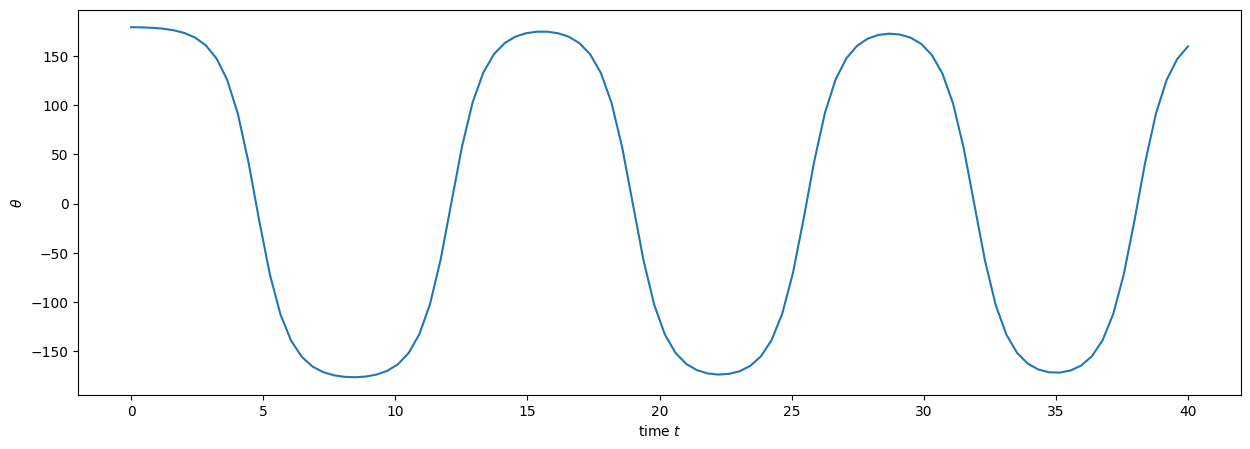

In [4]:
g = 9.81 
l = 10e-2 # in meters 
def f( y , t):
    ft = y[1]
    fv = (-g/l)*np.sin( np.pi*y[0]/180 )
    return np.array([ft,fv])

y , t = RK4( 0 , 40 , np.array([179 , 0 ]) , f  ) 

plt.figure( figsize = ( 15 , 5 ))
plt.plot( t , y[ : , 0 ])
plt.xlabel(r'time $t$')
plt.ylabel(r'$\theta$')
plt.show()

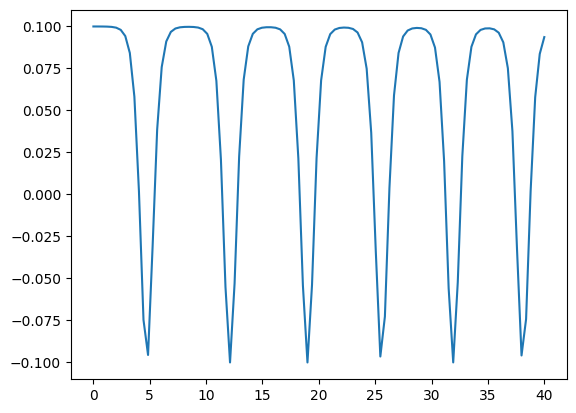

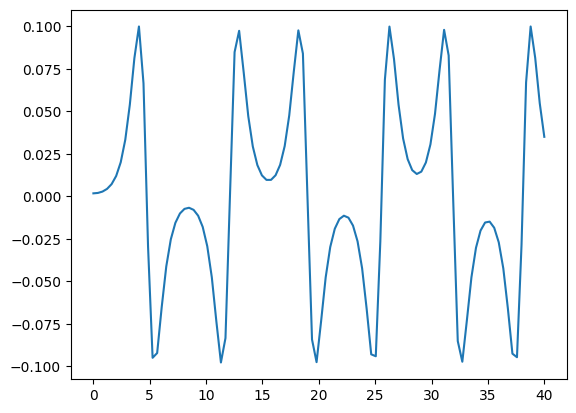

In [5]:
ycat = -l*np.cos(np.deg2rad(y[:,0]))
plt.plot( t , ycat )
plt.show()

xcat = l*np.sin(np.deg2rad(y[:,0]))
plt.plot(t , xcat )
plt.show()

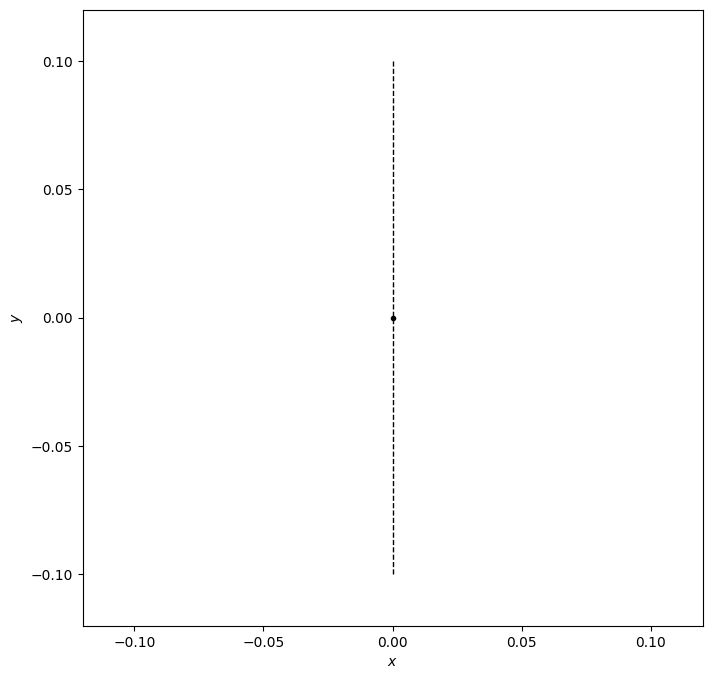

In [6]:
fig , ax = plt.subplots(figsize=(8,8))


# set up the subplots as needed
ax.set_xlim(( -.12 , .12 ))            
ax.set_ylim((-.12, .12))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ax.plot([0,0] , [-0.1,0.1] , 'k--' , linewidth = 1)
ax.plot( 0 , 0 , 'k.' , lw = 2 )

txt_title = ax.set_title('')
pt, = ax.plot([], [], 'b.' , lw = 3 )     
line, = ax.plot([], [], 'r', lw=2)

In [141]:
from matplotlib.animation import FuncAnimation
def drawframe(n):
    th = y[n,0]
    x1 = l*math.sin(th*np.pi/180)
    y1 = -l*math.cos(th*np.pi/180)
    line.set_data([0,x1],[0,y1])
    pt.set_data( [x1] , [y1] )
    # line3.set_data(y1[0:50],y2[0:50])
    # pt1.set_data(y1[0],y2[0])
    txt_title.set_text(f'time = {t[n]}')
    return (line , pt )

anim = FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [143]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [144]:
anim 

MovieWriter stderr:
dyld[81035]: Library not loaded: /opt/homebrew/opt/libvmaf/lib/libvmaf.1.dylib
  Referenced from: <E5EF74D5-4449-3419-8741-89B093266435> /opt/homebrew/Cellar/ffmpeg/6.0_2/bin/ffmpeg
  Reason: tried: '/opt/homebrew/opt/libvmaf/lib/libvmaf.1.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libvmaf/lib/libvmaf.1.dylib' (no such file), '/opt/homebrew/opt/libvmaf/lib/libvmaf.1.dylib' (no such file), '/usr/local/lib/libvmaf.1.dylib' (no such file), '/usr/lib/libvmaf.1.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/libvmaf/3.0.0/lib/libvmaf.1.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/Cellar/libvmaf/3.0.0/lib/libvmaf.1.dylib' (no such file), '/opt/homebrew/Cellar/libvmaf/3.0.0/lib/libvmaf.1.dylib' (no such file), '/usr/local/lib/libvmaf.1.dylib' (no such file), '/usr/lib/libvmaf.1.dylib' (no such file, not in dyld cache)



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x800', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/2_/57hc11nj38q3thdjk_9kdswc0000gn/T/tmpra_mpezd/temp.m4v']' died with <Signals.SIGABRT: 6>.

In [ ]:
for i in range(y[:,0].size): 
    th = y[i , 0 ]
    x1 = l*math.sin(th*np.pi/180)
    y1 = -l*math.cos(th*np.pi/180)
    plt.xlim( -.12 , 0.12 )
    plt.ylim( -0.12 , 0.12 )
        
    plt.plot([0,0] , [-0.1,0.1] , 'k--' , linewidth = 1)
    plt.plot( [0,x1] , [0,y1] , 'b--' , linewidth = 3 )
        
    plt.title(f'at t = {t[i]}')
    plt.pause( 0.001 )

plt.show()
        

In [107]:
# for i in range(y[:,0].size): 
#     print( i )
y.shape  

()

$$\frac{d^2 \theta}{d t^2 } = -\frac{g}{l}\sin \theta + C\cos \theta \sin \Omega t $$

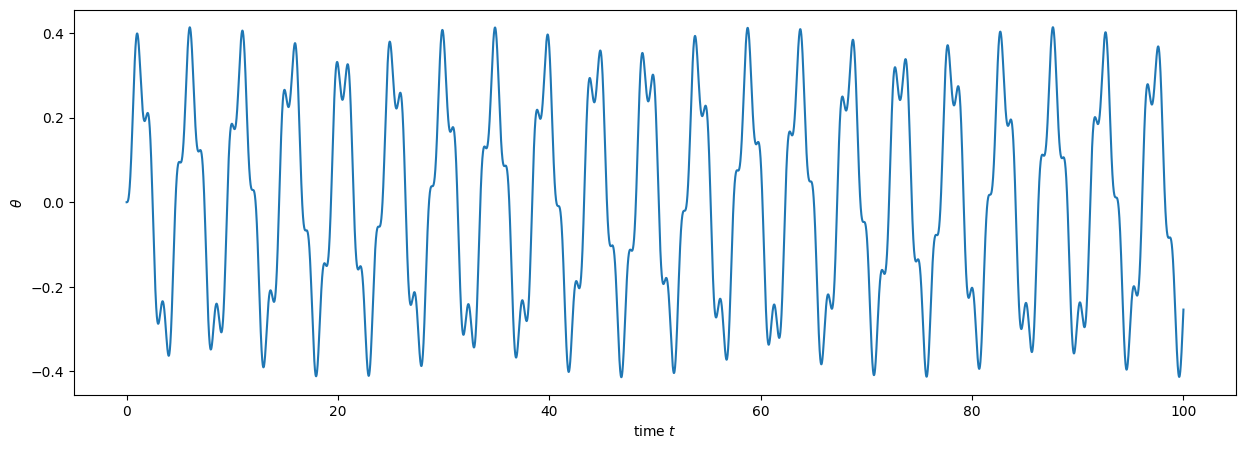

In [4]:
C = 2 
Omega = 5 
def f2( y , t):
    ft = y[1]
    fv = (-g/l)*np.sin( y[0]*np.pi/180 ) + C*np.cos(y[0]*np.pi/180)*np.sin(Omega*t)
    return np.array([ft,fv])

y , t = RK4( 0 , 100 , np.array([0,0]) , f2  ) 

plt.figure( figsize = ( 15 , 5 ))
plt.plot( t , y[ : , 0 ])
plt.xlabel(r'time $t$')
plt.ylabel(r'$\theta$')
plt.show()

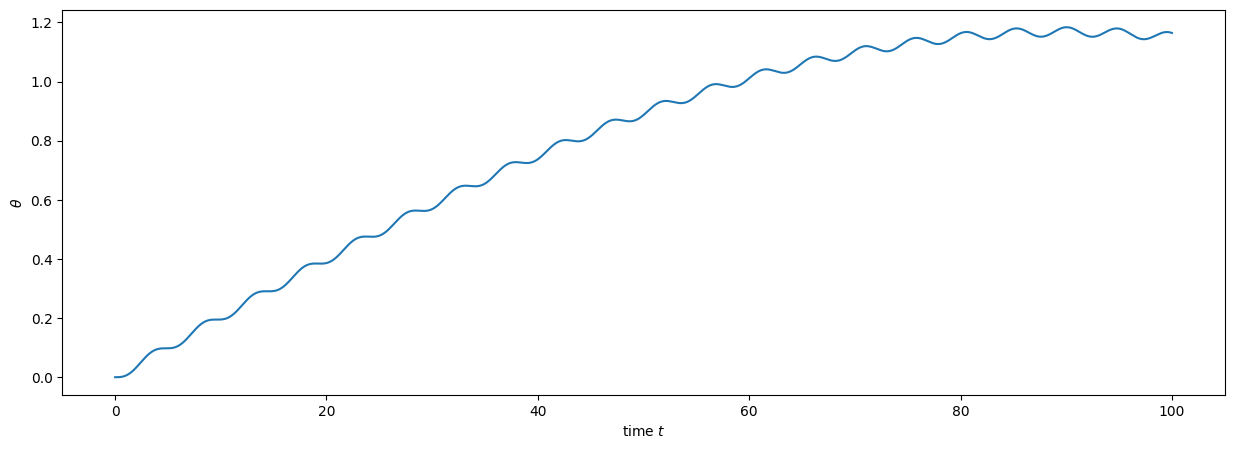

In [5]:
C = 2 
Omega = np.pi/180
def f2( y , t):
    ft = y[1]
    fv = (-g/l)*np.sin( y[0]*np.pi/180 ) + C*np.cos(y[0]*np.pi/180)*np.sin(Omega*t)
    return np.array([ft,fv])

y , t = RK4( 0 , 100 , np.array([0,0]) , f2  ) 

plt.figure( figsize = ( 15 , 5 ))
plt.plot( t , y[ : , 0 ])
plt.xlabel(r'time $t$')
plt.ylabel(r'$\theta$')
plt.show()

# Question 2 
## Trajectory with air resistance

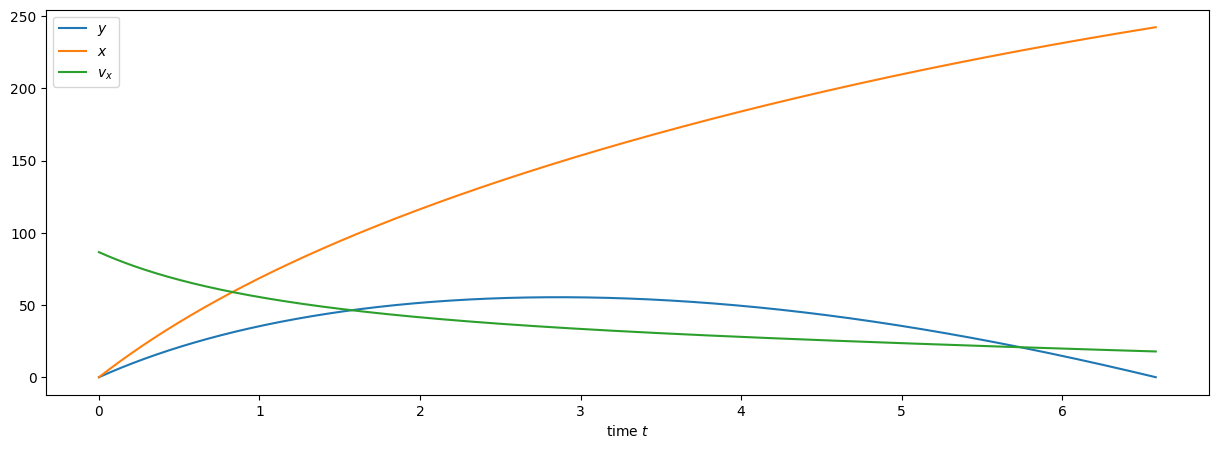

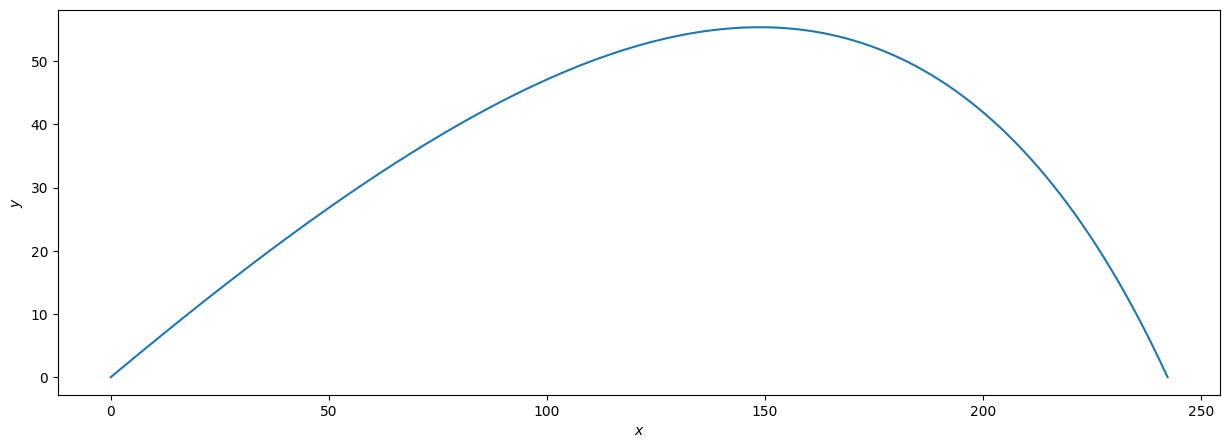

In [6]:
g = 9.81  
m = 1 
r = 8e-2 
rho = 1.22 
C = 0.47 
v0x = 100*np.cos( 30*np.pi/180)
v0y = 100*np.sin( 30*np.pi/180)

const = -(np.pi * (r**2) * rho * C )/(2 * m )

def f3( y ,t ):
    fx = y[1]
    fvx = const*y[1]*math.sqrt( y[1]**2 + y[3]**2 )
    fy = y[3]
    fvy = -g + const*y[3]*math.sqrt( y[1]**2 + y[3]**2 )
    return np.array([fx , fvx , fy , fvy ])

y , t = RK4( 0 , 10 , np.array([0,v0x,0,v0y]) , f3   ) 

index = np.where( y[:,2] < 0 )[0][0]


plt.figure( figsize = ( 15 , 5 ))
plt.plot( t[:index] , y[:index,2] , label = r'$y$')
plt.plot( t[:index] , y[:index,0] , label = r'$x$')
plt.plot( t[:index] , y[:index,1] , label = r'$v_x$')
plt.xlabel(r'time $t$')
plt.legend()
plt.show()


plt.figure( figsize = ( 15 , 5 ))
plt.plot( y[:index,0] , y[:index,2] )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [7]:
dist_travelled = []
mass = np.linspace( 1 , 10 , 20 )

for m in mass : 
    const = -(np.pi * (r**2) * rho * C )/(2 * m )
    def f3( y ,t ):
        fx = y[1]
        fvx = const*y[1]*math.sqrt( y[1]**2 + y[3]**2 )
        fy = y[3]
        fvy = -g + const*y[3]*math.sqrt( y[1]**2 + y[3]**2 )
        return np.array([fx , fvx , fy , fvy ])

    y , t = RK4( 0 , 10 , np.array([0,v0x,0,v0y]) , f3  ) 

    index = np.where( y[:,2] < 0 )[0][0]
    dist_travelled.append( y[index,0])

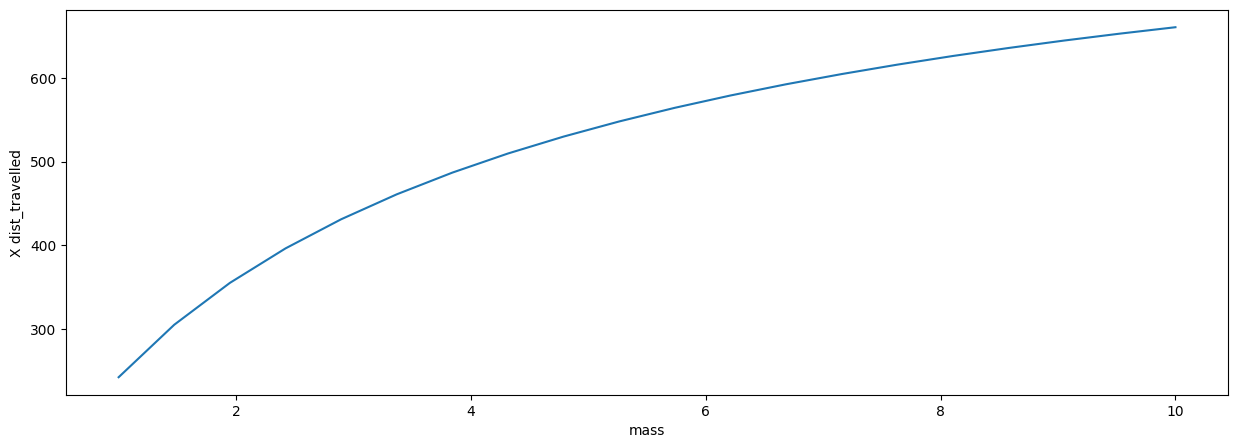

In [8]:
plt.figure( figsize = ( 15 , 5 ))
plt.plot( mass , dist_travelled  )
plt.xlabel('mass')
plt.ylabel('X dist_travelled')
plt.show()

In [9]:
M = 1.9891e30 
G = 6.6743e-11 

T = math.sqrt( (4 * (math.pi**2) * (1e12)**3)/(G*M) )
T

545316574.3516525

In [10]:
def f4( y ,t ):
    r3 = (math.sqrt( y[0]**2 + y[2]**2 ))**3 
    fx = y[1]
    fvx = -G*M*y[0]/r3
    fy = y[3]
    fvy = -G*M*y[2]/r3
    return np.array([fx , fvx , fy , fvy ])

y0 = np.array([4e12,0,0,500], dtype = np.float64 ) 
y4 , t = RK4( 0 , 3*T, y0 , f4 , n = 10**7) 

In [11]:
np.where( np.abs(y4[:,2]) < 10000)

(array([      0, 9481605]),)

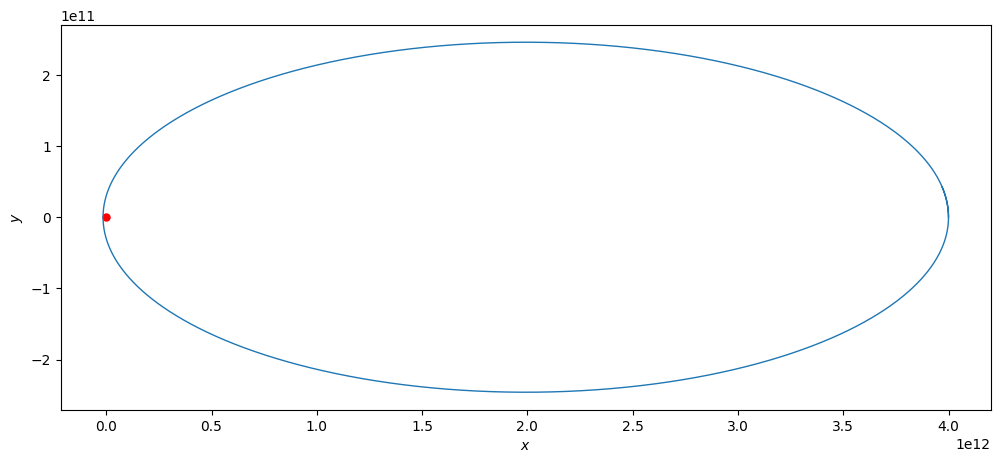

In [12]:
plt.figure( figsize = ( 12 , 5 ))
plt.plot( y4[:,0] , y4[:,2] , linewidth = 1 )
plt.scatter( 0 , 0 , linewidth = .05 , color = 'r')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

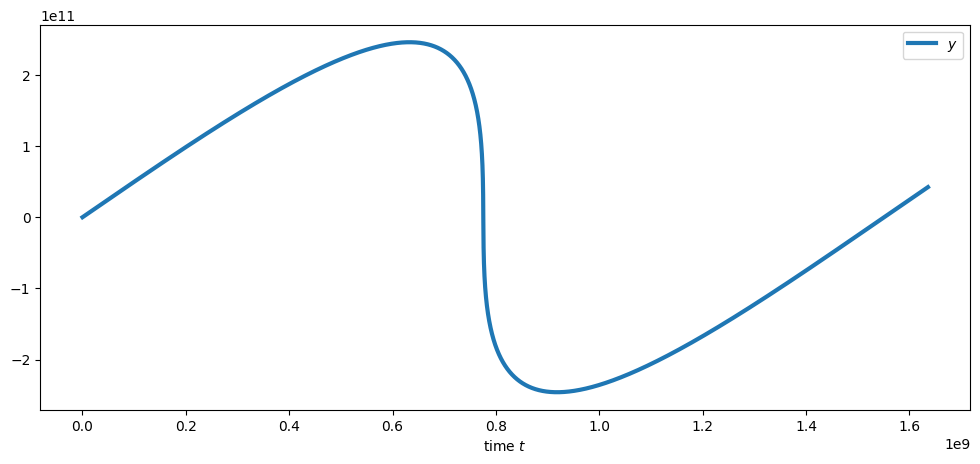

In [13]:
plt.figure( figsize = ( 12 , 5 ))
plt.plot( t , y4[:,2] , label = r'$y$'   )
plt.xlabel(r'time $t$')
plt.legend()
plt.show()

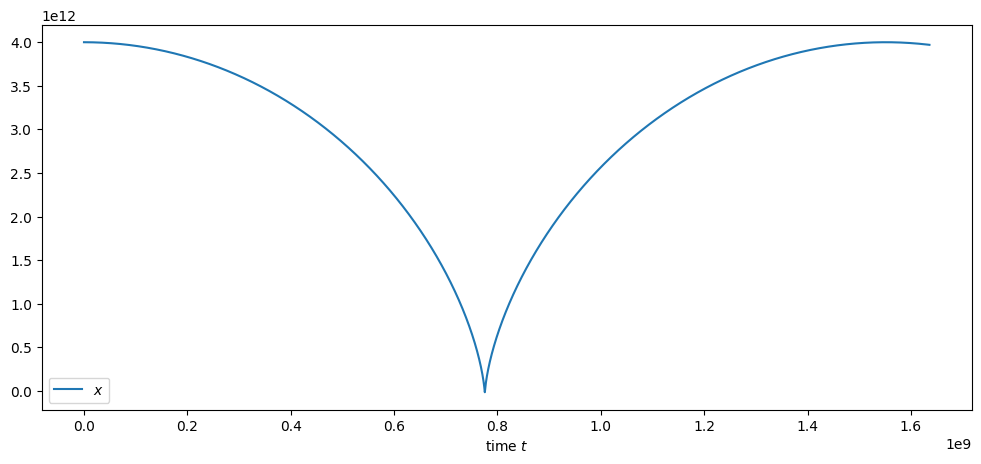

In [14]:
plt.figure( figsize = ( 12 , 5 ))
plt.plot( t , y4[:,0] , label = r'$x$')
plt.xlabel(r'time $t$')
plt.legend()
plt.show()

defining moddifies RK4 method !! 

In [26]:
# definning RK4 method to solve a 1st order
# differential equation with n 
# oupled variables 

def RK4( t , y , h , f   ): 
    k1 = h*f(y,t)
    k2 = h*f(y+k1/2 ,t+h/2)
    k3 = h*f(y+k2/2 ,t+h/2)
    k4 = h*f(y+k3, t+h)
    y = y + (k1 + 2*k2 + 2*k3 +k4)/6
    return y 

In [69]:
def adaptive_Rk4( t0 , tn , y0 , f , h0 = .01  , target_error = 6000 ):
    h = h0 
    tarray = []
    yarray = []
    t = t0 
    y = y0 
    while t < tn : 
        tarray.append(t)
        yarray.append(y)
        
        y11 = RK4( t,y,h,f )
        y12 = RK4(t+h,y11,h,f)
        y22 = RK4(t,y,2*h,f)
        error = np.average(np.abs( y12 - y22 ))/30 
        h = h*((target_error/(error+0.000001))**(0.2)) 
        
        y = RK4(t,y,h,f)
        t = t + h 
    return np.array(yarray), np.array(tarray) 

In [83]:
y0 = np.array([4e12,0,0,500], dtype = np.float64 ) 
y4 , t = adaptive_Rk4( 0 , 6*T, y0 , f4 ) 
print( y4.size )

1612


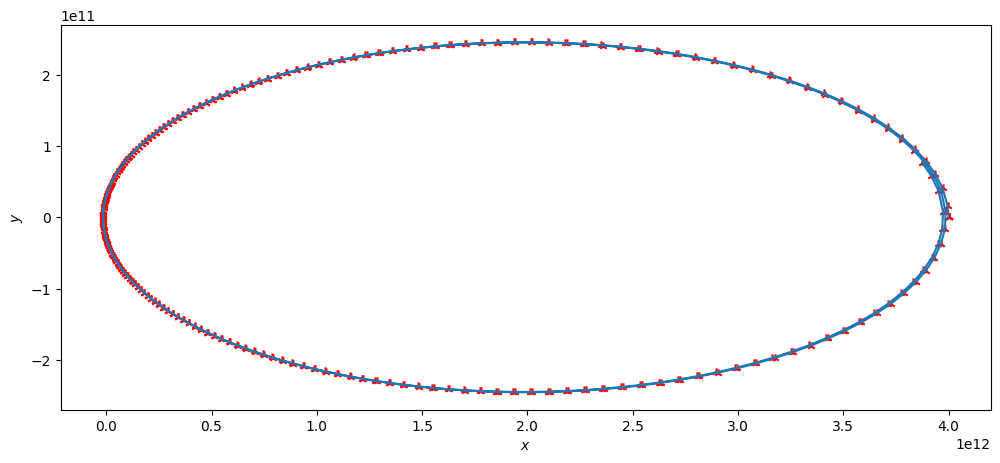

In [84]:
plt.figure( figsize = ( 12 , 5 ))
plt.plot( y4[:,0] , y4[:,2] )
plt.scatter( y4[:,0] , y4[:,2] , c = 'r' , marker= '2' )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

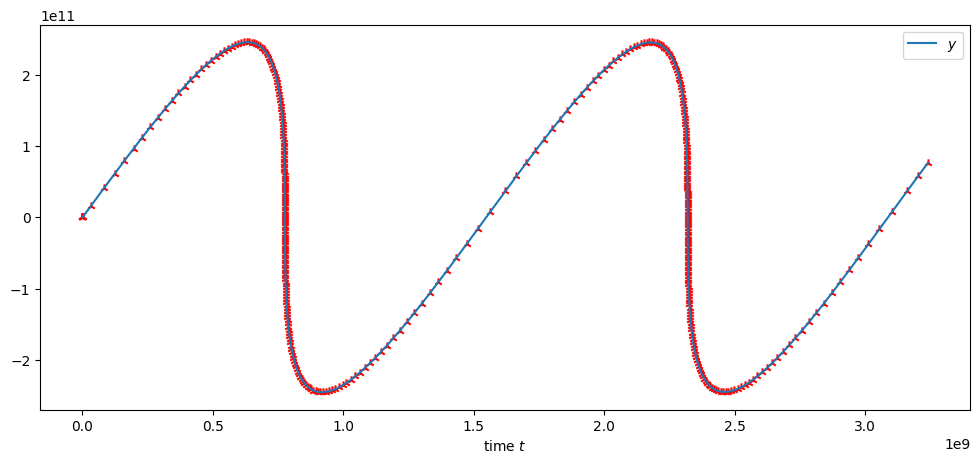

In [85]:
plt.figure( figsize = ( 12 , 5 ))
plt.plot( t , y4[:,2] , label = r'$y$'  )
plt.scatter( t , y4[:,2] , color= 'r' , marker ='2'  )
plt.xlabel(r'time $t$')
plt.legend()
plt.show()

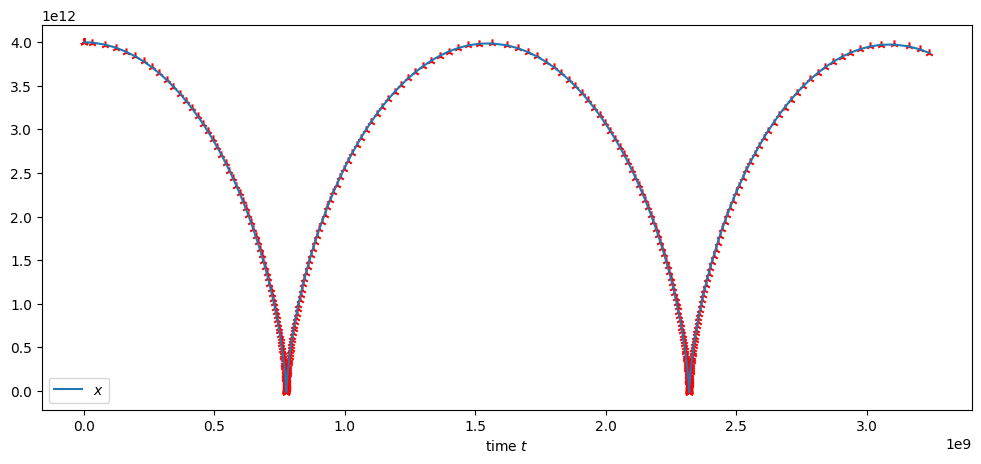

In [86]:
plt.figure( figsize = ( 12 , 5 ))
plt.plot( t , y4[:,0] , label = r'$x$')
plt.scatter( t , y4[:,0] , color = 'r' , marker = '2')
plt.xlabel(r'time $t$')
plt.legend()
plt.show()